In [4]:
import pandas as pd 

In [5]:
#TODO 过滤segmental duplication
SD_annotion=pd.read_csv(
    "HC04_SD.annotation.sd",
    header=None,index_col=None,sep="\t"
)

In [14]:
def SD_filter(SD):
    X,ID=SD[13].split(";")
    Xratio=float(X.strip("X="))
    IDratio=float(ID.strip("ID="))
    if SD[11]>=1000 and Xratio<=10 and IDratio<=50:
        #* 片段长度超过1000
        #* 相似度超过90%
        #* gap少于50%
        return True
    else:
        return False

In [11]:
SD_annotion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2,HC04_D03,2032560,2033527,HC04_D03,2033081,2034083,Finally_Masked_HC04:Finally_Masked_HC04,19.8,+,+,1002,1048,71M7D18M74D351M1I240M1I168M38I31M6I42M,X=7.6;ID=12.1
3,HC04_A11,15125787,15126812,HC04_A11,15126348,15127372,Finally_Masked_HC04:Finally_Masked_HC04,0.4,+,+,1025,1025,352M1I672M,X=0.3;ID=0.1
5,HC04_A09,4728738,4729613,HC04_A09,4729178,4730154,Finally_Masked_HC04:Finally_Masked_HC04,33.8,+,+,976,1038,79M44D13M44D364M40D28M2D38M3I50M3I31M8I34M3I50...,X=12.1;ID=21.7
6,HC04_D03,52143120,52144444,HC04_D03,52144439,52145759,Finally_Masked_HC04:Finally_Masked_HC04,10.2,+,+,1324,1337,132M3D11M5I183M3D176M1D64M1D183M1I11M11I534M5D13M,X=7.9;ID=2.2
8,HC04_D10,14627579,14628846,HC04_D10,14628279,14629685,Finally_Masked_HC04:Finally_Masked_HC04,16.7,+,+,1406,1407,99M16D26M4D417M1I121M120D603M,X=6.7;ID=10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26467147,HC04_D01,29354989,29356220,HC04_D01,29518672,29519525,Finally_Masked_HC04:Finally_Masked_HC04,43.3,+,-,1231,1238,62M1D52M2I40M4I45M1D11M2D36M3I20M1D17M1D49M2I4...,X=11.6;ID=31.7
26467149,HC04_D01,29398550,29399681,HC04_D01,29565794,29566880,Finally_Masked_HC04:Finally_Masked_HC04,35.3,+,-,1131,1139,541M1D22M4I15M15I24M5I133M17I15M2D7M3I44M1D41M...,X=29.9;ID=5.4
26467150,HC04_D01,29335492,29336245,HC04_D01,29630194,29634936,Finally_Masked_HC04:Finally_Masked_HC04,86.7,+,-,4742,4766,184M10D151M24I42M3D60M20D30M1D6M3977D54M1D145M...,X=2;ID=84.7
26467151,HC04_D01,29434443,29435349,HC04_D01,29698334,29699675,Finally_Masked_HC04:Finally_Masked_HC04,62.9,+,-,1341,1493,33M21I12M24I101M6D76M37D46M72D22M42D32M16D9M22...,X=13.4;ID=49.5


In [15]:
SD_filter_Index=SD_annotion.apply(lambda x:SD_filter(x),axis=1)
SD_filter=SD_annotion.loc[SD_filter_Index]

In [21]:
SD_filter.to_csv("HC04_SD_filter.txt",header=False,index=False,sep="\t")

In [46]:
leftSD=pd.read_csv(
    "intersectData.txt",
    header=None,index_col=None,sep="\t"
)
rightSD=pd.read_csv(
    "intersectData.txt",
    header=None,index_col=None,sep="\t"
)

In [29]:
SD_filter['leftSD']=SD_filter.apply(
    lambda x:"{}:{}-{}".format(x[0],x[1],x[2]),axis=1
)

/tmp/ipykernel_24283/2951494003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD_filter['leftSD']=SD_filter.apply(


In [30]:
SD_filter['rightSD']=SD_filter.apply(
    lambda x:"{}:{}-{}".format(x[3],x[4],x[5]),axis=1
)

/tmp/ipykernel_24283/3480075230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD_filter['rightSD']=SD_filter.apply(


In [47]:
leftSD_ID=leftSD.apply(
    lambda x:"{}:{}-{}".format(x[0],x[1],x[2]),axis=1
)
rightSD_ID=rightSD.apply(
    lambda x:"{}:{}-{}".format(x[0],x[1],x[2]),axis=1
)


In [48]:
#TODO 根据与TE的交集结果，筛选最终得到的SD集合
SD_filter_END=SD_filter.loc[
    (SD_filter['leftSD'].isin(rightSD_ID.values))|(SD_filter['rightSD'].isin(rightSD_ID.values))
]

In [52]:
SD_filter_END[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].to_csv("./HC04_SD_filter_END.txt",header=False,index=False,sep="\t")

In [56]:
#TODO 统计SD-Pairs在染色体之间的分布规律
SD_filter_END=pd.read_csv(
    "./HC04_SD_filter_END.txt",
    header=None,index_col=None,sep="\t"
)
ChromList=pd.read_csv("HC04-Repeat_TRF_softMasked.fa.fai",header=None,index_col=None,sep="\t")

In [58]:
from itertools import combinations

In [62]:
ChromGroups=list(combinations(ChromList[0].values,2))

In [103]:
SDCountData=[]
for Chrom1,Chrom2 in ChromGroups:
    filterSD_Pairs=SD_filter_END.loc[
        (SD_filter_END[0].isin([Chrom1,Chrom2]))&(
            SD_filter_END[3].isin([Chrom1,Chrom2])
        )
    ]
    SDCountData.append(
        (Chrom1,Chrom2,filterSD_Pairs.shape[0])
    )
for chrom in ChromList[0].values:
    filterSD_Pairs=SD_filter_END.loc[
        (SD_filter_END[0].isin([chrom]))&(
            SD_filter_END[3].isin([chrom])
        )
    ]
    SDCountData.append(
        (chrom,chrom,filterSD_Pairs.shape[0])
    )
SDCountData=pd.DataFrame(SDCountData)

In [104]:
SD_countBetweenChroms=pd.pivot(
    SDCountData,index=0,columns=1,values=2,
)

In [107]:
import numpy as np
upper_triangular=SD_countBetweenChroms.values
complete_matrix = np.triu(upper_triangular) + np.triu(upper_triangular, k=1).T
SD_count_Fin=pd.DataFrame(complete_matrix,index=ChromList[0].values,columns=ChromList[0].values)

In [113]:
import seaborn as sns

<AxesSubplot:>

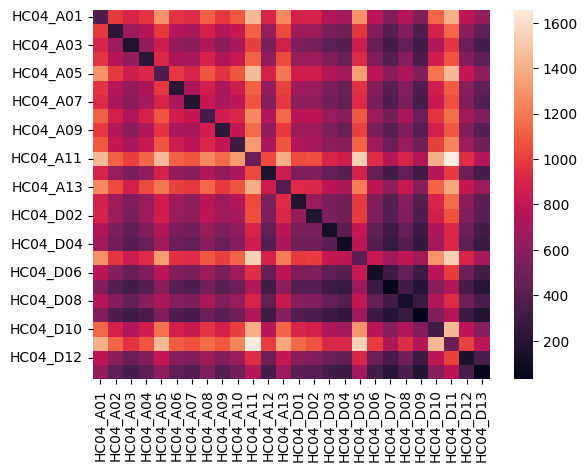

In [114]:
sns.heatmap(SD_count_Fin)